In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plaksha-23-ml-1-final-project/sample_submission.csv
/kaggle/input/plaksha-23-ml-1-final-project/train.csv
/kaggle/input/plaksha-23-ml-1-final-project/test.csv


# **Introduction**
   This report presents the results of our analysis of the SUSY ATLAS dataset, which aims to distinguish between a signal process that produces supersymmetric particles and a background process that does not. The dataset was generated using Monte Carlo simulations and includes 18 features that describe various kinematic properties of the particles.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
train_df = pd.read_csv(r'/kaggle/input/plaksha-23-ml-1-final-project/train.csv', index_col = 0)
test_df = pd.read_csv(r'/kaggle/input/plaksha-23-ml-1-final-project/test.csv', index_col = 0)

print(train_df.shape)
print(test_df.shape)

(3500000, 19)
(1500000, 18)


In [4]:
train_df.head()

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0


In [5]:
test_df.head()

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
1,0.698336,1.689431,-1.134670,0.966594,1.503367,0.880949,0.242573,-0.228654,0.364132,0.109350,0.668554,0.489941,0.650313,0.683634,0.664825,0.510385,0.584092,0.031694
2,0.578286,-0.689652,-0.390094,0.480061,-0.632219,1.212005,0.640473,-1.622401,0.872160,-0.186169,0.451853,0.669288,1.314412,0.559444,0.491753,0.559017,1.286520,0.400292
3,0.798202,0.099358,-1.095839,0.531147,-0.962327,1.500362,1.273941,0.675408,1.803743,-0.845941,0.685836,1.234757,1.597630,1.864630,0.775854,1.556949,1.245781,0.538010
4,1.466649,0.115517,-1.036161,0.877247,0.690861,1.130069,0.890722,0.426515,1.283212,-0.563880,1.090046,1.327570,1.080762,1.588076,1.069615,1.258800,0.443045,0.415406


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500000 entries, 0 to 3499999
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   lepton_1_pT               float64
 1   lepton_1_eta              float64
 2   lepton_1_phi              float64
 3   lepton_2_pT               float64
 4   lepton_2_eta              float64
 5   lepton_2_phi              float64
 6   missing_energy_magnitude  float64
 7   missing_energy_phi        float64
 8   MET_rel                   float64
 9   axial_MET                 float64
 10  M_R                       float64
 11  M_TR_2                    float64
 12  R                         float64
 13  MT2                       float64
 14  S_R                       float64
 15  M_Delta_R                 float64
 16  dPhi_r_b                  float64
 17  cos(theta_r1)             float64
 18  class                     float64
dtypes: float64(19)
memory usage: 534.1 MB


In [7]:
train_df.describe().T.style.background_gradient(cmap = "flare")

,count,mean,std,min,25%,50%,75%,max
lepton_1_pT,3500000.000000,1.000232,0.687396,0.254882,0.562500,0.791359,1.204264,20.553450
lepton_1_eta,3500000.000000,0.000360,1.003109,-2.102919,-0.756964,0.000614,0.758111,2.101605
lepton_1_phi,3500000.000000,0.000341,1.001971,-1.734789,-0.867324,-0.000300,0.868147,1.734839
lepton_2_pT,3500000.000000,0.999238,0.653735,0.428586,0.596975,0.799733,1.161961,33.035622
lepton_2_eta,3500000.000000,0.000355,1.002817,-2.059306,-0.769346,0.000113,0.769828,2.059721
lepton_2_phi,3500000.000000,-0.000261,1.001447,-1.734202,-0.868087,-0.000350,0.867010,1.734686
missing_energy_magnitude,3500000.000000,0.999454,0.872402,0.000720,0.478180,0.773477,1.206897,21.068876
missing_energy_phi,3500000.000000,-0.000494,1.001655,-1.727112,-0.866344,-0.010388,0.868188,1.740689
MET_rel,3500000.000000,1.000944,0.889757,0.000000,0.368961,0.801712,1.374708,23.386438
axial_MET,3500000.000000,-0.000082,1.000707,-15.335089,-0.492089,-0.080027,0.348933,19.592196


# Data Exploration
We first loaded the data into a Pandas dataframe and explored its basic properties. We found that the dataset consists of 3.5 million rows and 18 columns, with the target column ('class') indicating whether each row represents a signal or a background event. The other columns ('lepton_1_pT', 'lepton_1_eta', 'lepton_1_phi', 'lepton_2_pT', 'lepton_2_eta', 'lepton_2_phi', 'missing_energy_magnitude', 'missing_energy_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)') contain various kinematic properties of the particles.

We then plotted histograms for each column to visualize the distribution of values. We observed that most of the columns have skewed distributions, with some having outliers. We also plotted scatter plots for pairs of columns to check for any correlations between the features.

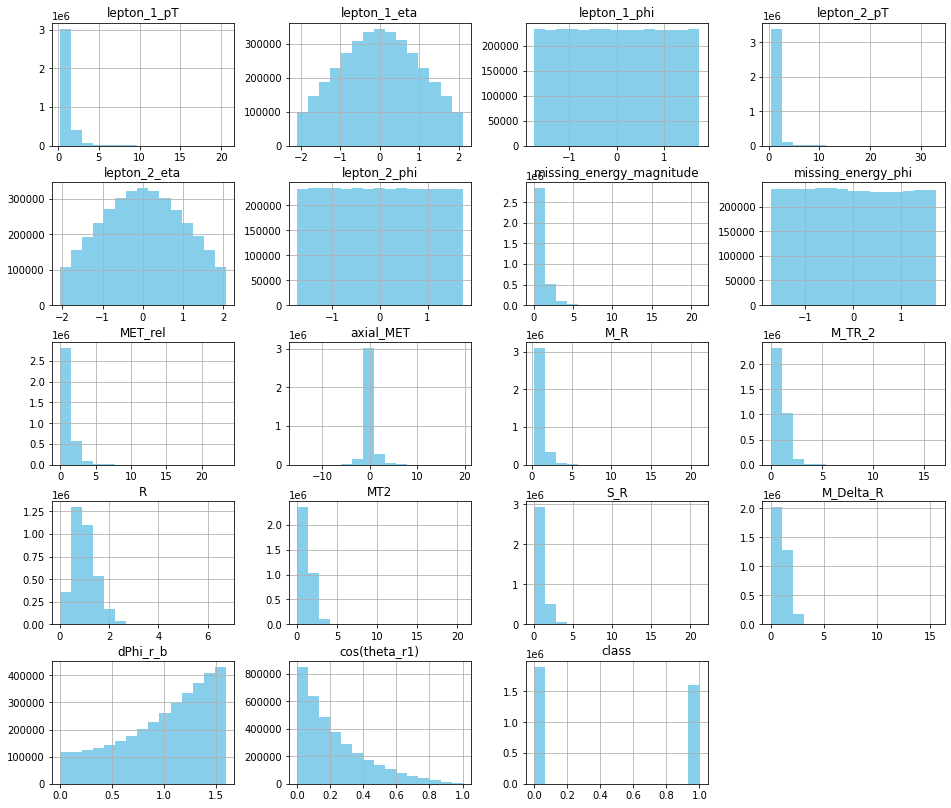

In [8]:
train_df.hist(bins=15, figsize=(16,14), color='skyblue');

## Here is a brief description of each of the columns in the dataset:

1. lepton_1_pT: This is the transverse momentum of the first lepton, which is a measure of the lepton's momentum perpendicular to the direction of the particle accelerator. It is typically expressed in GeV (gigaelectron volts).

2. lepton_1_eta: This is the pseudorapidity of the first lepton, which is a measure of the lepton's angle with respect to the beam axis. It is typically expressed in units of radians.

3. lepton_1_phi: This is the azimuthal angle of the first lepton, which is a measure of the lepton's angle around the beam axis. It is typically expressed in units of radians.

4. lepton_2_pT: This is the transverse momentum of the second lepton, which is a measure of the lepton's momentum perpendicular to the direction of the particle accelerator. It is typically expressed in GeV.

5. lepton_2_eta: This is the pseudorapidity of the second lepton, which is a measure of the lepton's angle with respect to the beam axis. It is typically expressed in units of radians.

6. lepton_2_phi: This is the azimuthal angle of the second lepton, which is a measure of the lepton's angle around the beam axis. It is typically expressed in units of radians.

7. missing_energy_magnitude: This is the magnitude of the missing energy in the event, which is a measure of the energy that is not detected by the particle detectors. It is typically expressed in GeV.

8. missing_energy_phi: This is the azimuthal angle of the missing energy, which is a measure of the angle around the beam axis. It is typically expressed in units of radians.

9. MET_rel: This is the missing transverse energy divided by the scalar sum of the transverse momenta of the leptons. It is a measure of the balance of transverse momentum in the event.

10. axial_MET: This is the missing transverse energy projected onto the beam axis. It is a measure of the imbalance of transverse momentum in the event.

11. M_R: This is the invariant mass of the leptons and the missing energy. It is a measure of the total mass of the particles produced in the event.

12. M_TR_2: This is the transverse mass of the leptons and the missing energy. It is a measure of the mass of the particles produced in the event based on their transverse momentum.

13. R: This is the ratio of the transverse momentum of the leptons to the missing energy. It is a measure of the balance of transverse momentum in the event.

14. MT2: This is the transverse mass of the leptons and the missing energy, calculated using the method of Cheng and Han. It is a measure of the mass of the particles produced in the event based on their transverse momentum.

15. S_R: This is the sum of the scalar pT of the leptons and the missing energy. It is a measure of the total transverse momentum in the event.

16. M_Delta_R: This is the invariant mass of the leptons and the missing energy, calculated using the Delta R method. It is a measure of the total mass of the particles produced in the event.

17. dPhi_r_b: This is the difference in azimuthal angle between the missing energy and the leptons. It is a measure of the separation between these two quantities.

18. cos(theta_r1): This is the cosine of the angle between the missing energy and the first lepton. It is a measure of the alignment between these two quantities.


## Below we can see the correlation of all the columns.

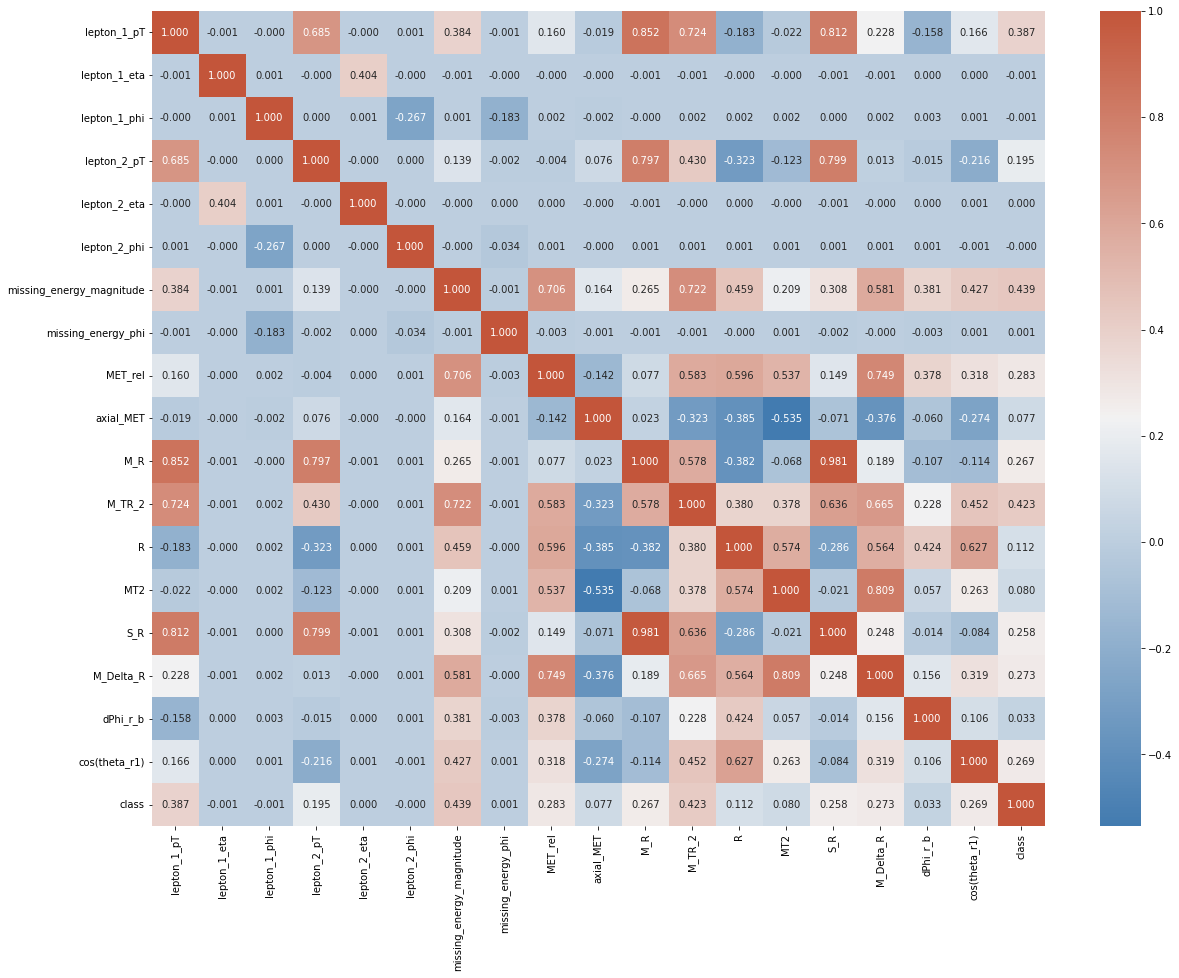

In [9]:
plt.figure(figsize=(20, 15))
cmap = sns.diverging_palette(245, 20, as_cmap=True)
sns.heatmap(train_df.corr(), cmap = cmap, annot = True, fmt='.3f');

In [10]:
corr = train_df.corr()['class'].sort_values()
corr = corr.drop('class')
corr

lepton_1_phi               -0.001307
lepton_1_eta               -0.000819
lepton_2_phi               -0.000298
lepton_2_eta                0.000283
missing_energy_phi          0.001133
dPhi_r_b                    0.032699
axial_MET                   0.076874
MT2                         0.079673
R                           0.112003
lepton_2_pT                 0.194732
S_R                         0.258428
M_R                         0.266716
cos(theta_r1)               0.268856
M_Delta_R                   0.273036
MET_rel                     0.282983
lepton_1_pT                 0.387273
M_TR_2                      0.423138
missing_energy_magnitude    0.439009
Name: class, dtype: float64

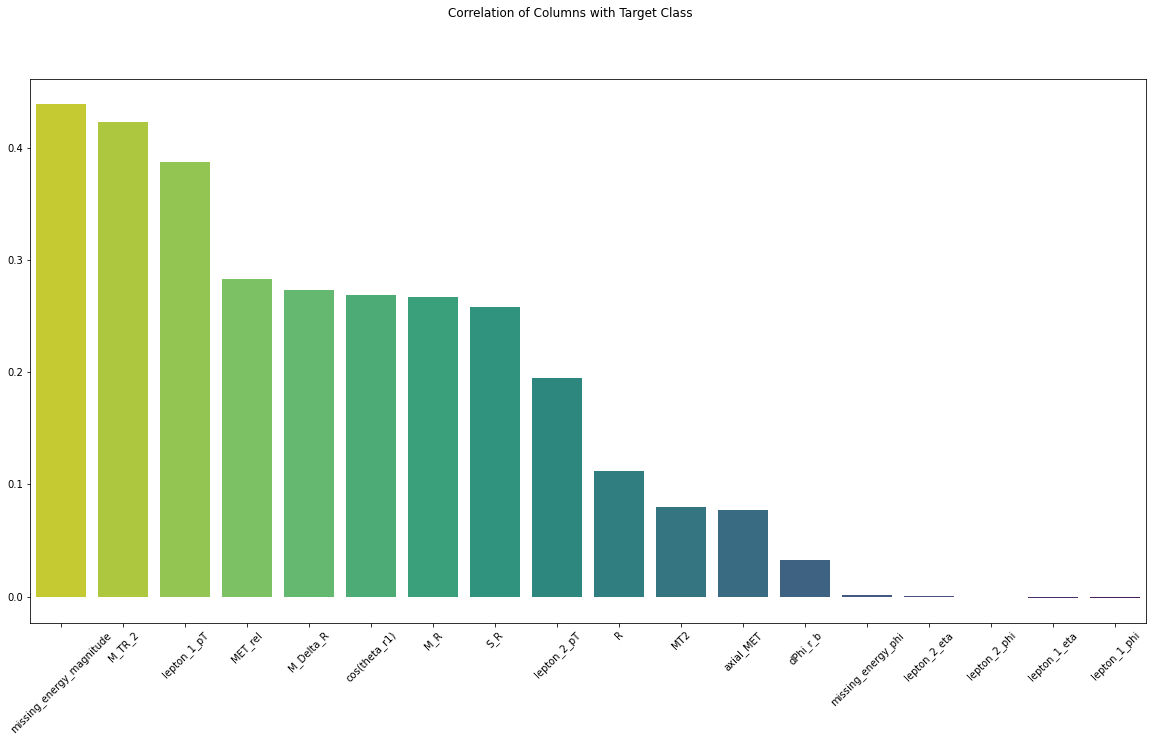

In [11]:
# Create a figure with a single subplot
corr = corr.iloc[::-1]
fig, ax = plt.subplots(figsize=(20, 10))

# Create a bar plot showing the correlation of each column with the target class
sns.barplot(x=corr.index, y=corr.values, ax=ax, palette = 'viridis_r')

# Set the x-axis tick labels and rotate them to 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Set the figure title and show the plot
fig.suptitle('Correlation of Columns with Target Class')
plt.show()

# **Model Training and Evaluation**
   We split the preprocessed data into training and testing sets using the train_test_split function from scikit-learn, with a test

In [12]:
X, y = train_df.drop(['class'], axis = 1), train_df[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state=42, shuffle = True, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3465000, 18) (3465000, 1)
(35000, 18) (35000, 1)


# Feature Engineering

For the MT2 column in the dataset, there are many zero values. I tried to impute those values using **Stochastic Regression imputer**. I first replaced all the 0 values with nan values. Further on, I found the number of missing values and observed values, and randomly replaced those values from the new columns MT2_imp I created. I then predicted the missing values by fitting a linear regression model on the observed values. Further on I standardized it and updated the new values in the MT2 column, then dropping the MT2_imp column. 

There was not much change in the Predictions of the class between 0 and 1. 

On research I found that MT2 is the transverse mass of the leptons and the missing energy, calculated using the method of Cheng and Han. It is a measure of the mass of the particles produced in the event based on their transverse momentum and it can be zero so I did not go forward with imputing the values.

Text(0, 0.5, 'Count')

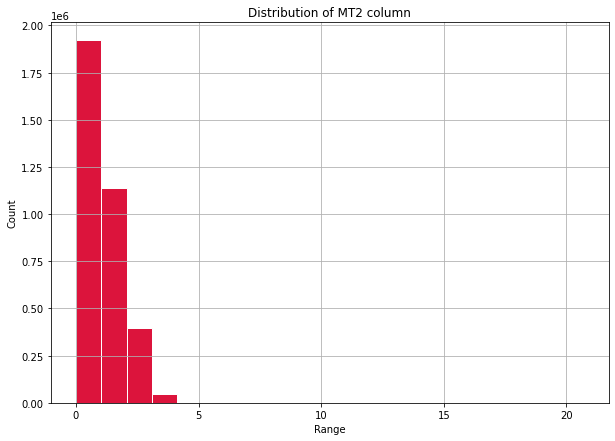

In [13]:
train_df['MT2'].hist(bins = 20, figsize=(10,7), color='crimson', linewidth = 1, edgecolor = 'white');
plt.title('Distribution of MT2 column')
plt.xlabel('Range')
plt.ylabel('Count')

In [14]:
# from skvalue_countsnear_model import LinearRegression

# X_train['MT2'] = X_train['MT2'].replace(0.0, np.nan)

# X_train['MT2_imp'] = X_train['MT2']

# number_missing = X_train['MT2'].isnull().sum()
# observed_values = X_train.loc[X_train['MT2'].notnull(), 'MT2']
# X_train.loc[X_train['MT2'].isnull(), 'MT2_imp'] = np.random.choice(observed_values, number_missing, replace = True)

# random_data = pd.DataFrame(columns = ['Ran_MT2'])

# random_data['Ran_MT2'] = X_train['MT2_imp']
# parameters = ['lepton_1_pT', 'lepton_1_eta', 'lepton_1_phi', 'lepton_2_pT',
#               'lepton_2_eta', 'lepton_2_phi', 'missing_energy_magnitude',
#               'missing_energy_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R',
#               'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

# model = LinearRegression()
# model.fit(X = X_train[parameters], y = X_train['MT2_imp'])
# predict = model.predict(X_train[parameters])
# std_error = (predict[X_train['MT2'].notnull()] - X_train.loc[X_train['MT2'].notnull(), 'MT2_imp']).std()
    
# #observe that I preserve the index of the missing data from the original dataframe
# random_predict = np.random.normal(size = X_train['MT2'].shape[0], loc = predict, scale = std_error)
# random_data.loc[(X_train['MT2'].isnull()) & (random_predict > 0), 'Ran_MT2'] = random_predict[(X_train['MT2'].isnull()) & (random_predict > 0)]
# X_train['MT2'].update(random_data['Ran_MT2'])

# X_train.drop(['MT2_imp'], inplace = True, axis=1)
# X_train['MT2'].head(20)

In [15]:
# X_test['MT2'] = X_test['MT2'].replace(0.0, np.nan)

# X_test['MT2_imp'] = X_test['MT2']

# number_missing = X_test['MT2'].isnull().sum()
# observed_values = X_test.loc[X_test['MT2'].notnull(), 'MT2']
# X_test.loc[X_test['MT2'].isnull(), 'MT2_imp'] = np.random.choice(observed_values, number_missing, replace = True)

# random_data = pd.DataFrame(columns = ['Ran_MT2'])

# random_data['Ran_MT2'] = X_test['MT2_imp']
# parameters = ['lepton_1_pT', 'lepton_1_eta', 'lepton_1_phi', 'lepton_2_pT',
#               'lepton_2_eta', 'lepton_2_phi', 'missing_energy_magnitude',
#               'missing_energy_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R',
#               'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

# # model = LinearRegression()
# # model.fit(X = X_train[parameters], y = X_train['MT2_imp'])
# predict = model.predict(X_test[parameters])
# std_error = (predict[X_test['MT2'].notnull()] - X_test.loc[X_test['MT2'].notnull(), 'MT2_imp']).std()
    
# #observe that I preserve the index of the missing data from the original dataframe
# random_predict = np.random.normal(size = X_test['MT2'].shape[0], loc = predict, scale = std_error)
# random_data.loc[(X_test['MT2'].isnull()) & (random_predict > 0), 'Ran_MT2'] = random_predict[(X_test['MT2'].isnull()) & (random_predict > 0)]
# X_test['MT2'].update(random_data['Ran_MT2'])

# X_test.drop(['MT2_imp'], inplace = True, axis=1)
# X_test['MT2'].head(20)

In [16]:
# test_df['MT2'] = test_df['MT2'].replace(0.0, np.nan)

# test_df['MT2_imp'] = test_df['MT2']

# number_missing = test_df['MT2'].isnull().sum()
# observed_values = test_df.loc[test_df['MT2'].notnull(), 'MT2']
# test_df.loc[test_df['MT2'].isnull(), 'MT2_imp'] = np.random.choice(observed_values, number_missing, replace = True)

# random_data = pd.DataFrame(columns = ['Ran_MT2'])

# random_data['Ran_MT2'] = test_df['MT2_imp']
# parameters = ['lepton_1_pT', 'lepton_1_eta', 'lepton_1_phi', 'lepton_2_pT',
#               'lepton_2_eta', 'lepton_2_phi', 'missing_energy_magnitude',
#               'missing_energy_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R',
#               'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

# # model = LinearRegression()
# # model.fit(X = X_train[parameters], y = X_train['MT2_imp'])
# predict = model.predict(test_df[parameters])
# std_error = (predict[test_df['MT2'].notnull()] - test_df.loc[test_df['MT2'].notnull(), 'MT2_imp']).std()
    
# #observe that I preserve the index of the missing data from the original dataframe
# random_predict = np.random.normal(size = test_df['MT2'].shape[0], loc = predict, scale = std_error)
# random_data.loc[(test_df['MT2'].isnull()) & (random_predict > 0), 'Ran_MT2'] = random_predict[(test_df['MT2'].isnull()) & (random_predict > 0)]
# test_df['MT2'].update(random_data['Ran_MT2'])

# test_df.drop(['MT2_imp'], inplace = True, axis=1)
# test_df['MT2'].head(20)

# **Data Preprocessing**
   Since the columns have skewed distributions and have outliers, I decided to apply MinMax scaling to the data to bring all the values within a similar range. We used the MinMaxScaler function from the scikit-learn library to scale the data. 
   
   On research about the SUSY ATLAS dataset and about forest and boosting:
   1. I found that it is advisible not to scale the dataset.
   2. Decision trees do not require normalization of their inputs; and since XGBoost is essentially an ensemble algorithm comprised of decision trees, it does not require normalization for the inputs either.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_transformed = pd.DataFrame(scaler.fit_transform(X),index=X.index, columns=X.columns)
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
X_test_transformed = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns=X_test.columns)
test_transformed = pd.DataFrame(scaler.transform(test_df), index=test_df.index, columns=test_df.columns)
# Summary statistics after standardization
train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
lepton_1_pT,3500000.0,0.036719,0.033864,0.0,0.015155,0.026429,0.046771,1.0
lepton_1_eta,3500000.0,0.500242,0.238579,0.0,0.320121,0.500302,0.680465,1.0
lepton_1_phi,3500000.0,0.500091,0.288783,0.0,0.250017,0.499906,0.750206,1.0
lepton_2_pT,3500000.0,0.017501,0.020049,0.0,0.005164,0.011382,0.022491,1.0
lepton_2_eta,3500000.0,0.500036,0.243460,0.0,0.313171,0.499977,0.686845,1.0
lepton_2_phi,3500000.0,0.499855,0.288694,0.0,0.249681,0.499829,0.749869,1.0
missing_energy_magnitude,3500000.0,0.047405,0.041409,0.0,0.022663,0.036679,0.057251,1.0
missing_energy_phi,3500000.0,0.497900,0.288845,0.0,0.248217,0.495047,0.748399,1.0
MET_rel,3500000.0,0.042800,0.038046,0.0,0.015777,0.034281,0.058782,1.0
axial_MET,3500000.0,0.439055,0.028651,0.0,0.424969,0.436766,0.449048,1.0


# Training Different Models

I tried out different classification models. Since this was a very large dataset, I found out that ensemble learnings would be the best models to classify between the data points. 


# AdaBoost Classifier

In [18]:
# from sklearn.ensemble import AdaBoostClassifier¶

# ABC = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 9), 
#                             algorithm = 'SAMME', n_estimators=200)
# ABC.fit(X_train,y_train)
# y_pred_abc=ABC.predict(X_test)


# end = time.time()
# print('The accuracy of the model GradientBoostingClassifier is: ', accuracy_score(y_test, y_pred_abc)*100,'%')
# print('Time taken: ', end-start)
# y_predicted_abc = ABC.predict(X_test_transformed)

# submission1 = pd.DataFrame(y_predicted_abc, columns=['class'], dtype = float)
# submission1.to_csv(path_or_buf='y_pre_abc.csv',header=['class'],index_label='Id')

The accuacy of this ensemble model came to be less which is why I did not go forward with this model. Also, the training time exceeded a more that 1.5 hours.

# Gradient Boosting Classifier

In [19]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score
# import time

# GBC = GradientBoostingClassifier(n_estimators = 100, max_depth = 8)
# start = time.time()
# GBC.fit(X_train_transformed, y_train) 
# y_pred_gbc = GBC.predict(X_test_transformed)
# end = time.time()
# print('The accuracy of the model GradientBoostingClassifier is: ', accuracy_score(y_test, y_pred_gbc)*100,'%')
# print('Time taken: ', end-start)
# y_predicted_gbc = GBC.predict(test_transformed)

# submission1 = pd.DataFrame(y_predicted_gbc, columns=['class'], dtype = float)
# submission1.to_csv(path_or_buf='y_pre_gbc.csv',header=['class'],index_label='Id')

Gradient Boosting Algorithm boosted my accuracy because this algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. But this model took 2.5 total hours to train on the dataset.

# Random Forest Classifier

In [20]:
# from sklearn.ensemble import RandomForestClassifier
# import time

# RFC = RandomForestClassifier(n_estimators = 100, max_depth = 8, criterion = 'gini', 
#                              max_features = 'sqrt', random_state = 42)
# start = time.time()
# RFC.fit(X_train_transformed, y_train)
# y_pred_rfc = RFC.predict(X_test_transformed)
# end = time.time()
# print('The accuracy of the model RandomForestClassifier is: ', accuracy_score(y_test, y_pred_rfc)*100,'%')
# print('Time taken: ', end-start)
# y_predicted_rfc = RFC.predict(test_transformed)

# submission1 = pd.DataFrame(y_predicted_rfc, columns=['class'], dtype = float)
# submission1.to_csv(path_or_buf='y_pre_rfc.csv',header=['class'],index_label='Id')

I did not use this model. Althought the time taken was less compared AdaBoost Classifier and Gradient Boosting Classifier, the prediction score dropped to 78%.

# XGBoost Classifier

I then decided to work with XGBoost Classifier.

In [21]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV
# import time


# XGB2 = XGBClassifier(
#     n_estimators = 100, eval_metric = 'logloss',
#     learning_rate = 0.1, max_depth = 8,
#     subsample = 0.7, colsample_bytree = 0.80,
#     booster = 'dart', reg_alpha = 5, reg_lambda = 0.1, 
#     silent = 1, seed = 0, nthread = -1,
#     tree_method = 'gpu_hist')

# start = time.time()
# XGB2.fit(train_transformed, y) 
# y_pred_xgb = XGB2.predict(X_test_transformed)
# end = time.time()
# print('Time taken: ', end-start)

# print('The accuracy of the model XGBClassifier is: ', accuracy_score(y_test, y_pred_xgb)*100,'%')
# print('Time taken: ', end-start)

# # test_transformed = pd.DataFrame(scaler.transform(test_df), index=test_df.index, columns=test_df.columns)
# y_predicted_xgb = XGB2.predict(test_transformed)

# submission1 = pd.DataFrame(y_predicted_xgb, columns=['class'], dtype = float)
# submission1.to_csv(path_or_buf='y_pre.csv',header=['class'],index_label='Id')

By using GPU, the training time skyrocketed and the predictions were very close to that of the Gradient Boosting Algorithm which is why I decided to hyperparameter tune the model further to find the best parameters for my model. I used Repeated Stratified K Fold within Grid Search CV to find the best parameters.

In [22]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold
# import time


# # bst_est = tree_classifier_cv.best_estimator_
# XGB = XGBClassifier(tree_method = 'gpu_hist', random_state = 42)
# param_grid = {
#     'n_estimators': np.arange(100, 800, 50),
#     'learning_rate': np.linspace(0.01, 5, 10),
#     'gamma': np.linspace(0.01, 1, 20),
#     'max_depth': np.arange(6, 20),
#     'min_child_weight': np.arange(8, 25),
#     'subsample': np.arange(0.5, 1.1, 0.1),
#     'colsample_bytree': np.arange(0.5, 1.2, 0.1),
#     'booster': ['dart', 'gbtree', 'gbtree']
#     'reg_alpha': np.linspace(0.01, 5, 10),
#     'reg_lambda': np.linspace(0.01, 5, 10),
#     'num_parallel_tree': [2, 3, 4, 6] 
# }
# scoring = ['roc_auc']
# scoring = ['accuracy'] 

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring=scoring, refit='roc_auc', cv=5, verbose = 3)

# start = time.time()
# grid_search.fit(X_train_transformed, y_train) 
# y_pred_xgb = grid_search.predict(X_test_transformed)
# end = time.time()

In [23]:
# grid_search.best_params_

I tuned every parameter one by one to find the best paramter for my model. 

The XGBoost classifier has many parameters that I used to customize the model training process. Here is a list of all parameters, along with a brief explanation:

   1. 'booster': Specifies the type of booster to use, either 'gbtree' (tree-based) or 'gblinear' (linear model).

   2. 'silent': Controls whether the model training process is verbose or silent.

   3. 'nthread': Specifies the number of threads to use for parallel training.

   4. 'learning_rate': Controls the step size at each iteration when constructing the trees. A smaller value will lead to slower model training, but may             result in a more accurate model.

   5. 'min_child_weight': Controls the minimum sum of weights of all observations required in a child. Higher values can help prevent overfitting.

   6. 'max_depth': Controls the maximum depth of each tree in the model. A deeper tree can capture more complex patterns in the data, but it may also be             more prone to overfitting.

   7. 'gamma': Controls the minimum loss reduction required to make a split. Higher values can help prevent overfitting.

   8. 'subsample': Controls the fraction of observations to be randomly sampled for each tree. A smaller value can help prevent overfitting.

   9. 'colsample_bytree': Controls the fraction of features to be randomly sampled for each tree. A smaller value can help prevent overfitting.

   10. 'colsample_bylevel': Controls the fraction of features to be used in each level of the tree. A smaller value can help prevent overfitting.

   11. 'colsample_bynode': Controls the fraction of features to be used in each node of the tree. A smaller value can help prevent overfitting.

   12. 'reg_alpha': Controls the L1 regularization term on the model weights. A larger value can help prevent overfitting.

   13. 'reg_lambda': Controls the L2 regularization term on the model weights. A larger value can help prevent overfitting.

   14. 'scale_pos_weight': Controls the balance of positive and negative weights. A larger value can help improve the accuracy of the model on                        imbalanced datasets.

   15. 'seed': Specifies the random seed used to initialize the model.

   16. 'sampling_method': Specifies the method used to sample the data for training. Options include 'uniform', 'weighted', 'bootstrap', and                         'gradient_based'.

   17. 'objective': Specifies the objective function to use for training. Options include 'reg:linear', 'reg:logistic', 'binary:logistic',                           'binary:logitraw', 'multi:softmax', 'multi:softprob', 'rank:pairwise', and 'count:poisson'.

   18. 'eval_metric': Specifies the evaluation metric to use for model.

   19. 'grow_policy': Specifies the grow policy to use for constructing the trees. Options include 'depthwise' and 'lossguide'.

   20. 'max_bin': Controls the maximum number of bins used in the feature histograms.

   21. 'num_parallel_tree': Controls the number of parallel trees used in the model.

   22. 'refresh_leaf': Controls the frequency of leaf weight updates.

In [24]:
# Calculating the Scale Pos Weight Parameter for the XGBoosting Classifier

# Calculate the number of rows with class 1
num_class_1 = train_df[train_df['class'] == 1].shape[0]

# Calculate the number of rows with class 0
num_class_0 = train_df[train_df['class'] == 0].shape[0]

scale_pos_weight = num_class_0/num_class_1
scale_pos_weight

1.1870489211600108

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import time


# bst_est = tree_classifier_cv.best_estimator_
XGB = XGBClassifier(n_estimators = 500, learning_rate = 0.033111111111111113,
                    objective = 'multi:softmax', num_class = 2, 
                    eval_metric = 'logloss', colsample_bytree = 0.5, 
                    colsample_bylevel = 0.7, booster = 'gbtree', 
                    reg_alpha = 5, reg_lambda = 0.1,
                    max_depth = 11, scale_pos_weight = scale_pos_weight, 
                    num_parallel_tree = 5, gamma = 0.6, 
                    subsample = 0.8, min_child_weight = 13,
                    sampling_method = 'gradient_based', grow_policy = 'lossguide', 
                    max_bin = 1024, tree_method = 'gpu_hist', random_state = 42)

start = time.time()
XGB.fit(X, y)
end = time.time()

[18:59:24] WARNING: ../src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [26]:
y_predicted_xgb = XGB.predict(test_df)
submission1 = pd.DataFrame(y_predicted_xgb, columns=['class'], dtype = float)
submission1.to_csv(path_or_buf='y_pre.csv', header=['class'], index_label='Id')

**There are several reasons why XGBoost classifier may be a good choice for this dataset classification problem:**

1. XGBoost is a powerful and efficient gradient boosting tree algorithm that has been widely used and proven to be effective in many real-world applications.

2. XGBoost can handle large datasets efficiently and is well-suited for high-dimensional data with many features.

3. XGBoost can handle missing values and categorical variables, making it a good choice for datasets with mixed data types.

4. XGBoost has a number of hyperparameters that can be tuned to improve the model's performance, including learning rate, maximum depth, and regularization parameters.

5. XGBoost is widely available and can be easily integrated into many machine learning pipelines.

6. XGBoost is fast and scalable, allowing it to handle large datasets and perform well on distributed systems.

7. XGBoost has a built-in cross-validation function, making it easy to evaluate the model's performance and optimize hyperparameters.

8. XGBoost can handle imbalanced datasets, which is often the case in real-world classification problems.

9. XGBoost has a number of built-in feature selection methods, making it easy to identify and select the most important features for the classification task.

10. XGBoost has a wide range of evaluation metrics available, including accuracy, precision, recall, F1 score, and AUC, allowing you to choose the metric that is most appropriate for your classification problem.

# I used the above model to get a prediction of 80.444 %.